# Mobile Price Classfication using MLP

In [27]:
# Importing the required libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [28]:
# Reading the dataset
data_set = pd.read_csv("train.csv")
data_set.shape

(2000, 21)

In [29]:
# Splitting the input features and target variable in the dataset (last column is the target variable)
X = data_set.iloc[:, :-1]
y = data_set.iloc[:, -1]

## Without Normalization

In [30]:
# Splitting the dataset into training and testing subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Logistic/Sigmoid Activation Function

In [31]:
# Intializing the MLP
mlp_classifier1 = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic', max_iter=5000, random_state=42)

In [32]:
# Cross-validation and its performance metrics
accuracy_cv1 = cross_val_score(mlp_classifier1, X_train, y_train, cv=5, scoring='accuracy')
precision_cv1 = cross_val_score(mlp_classifier1, X_train, y_train, cv=5, scoring='precision_macro')
recall_cv1 = cross_val_score(mlp_classifier1, X_train, y_train, cv=5, scoring='recall_macro')
f1score_cv1 = cross_val_score(mlp_classifier1, X_train, y_train, cv=5, scoring='f1_macro')

acc_cv1 = round(np.mean(accuracy_cv1)*100,3)
pre_cv1 = round(np.mean(precision_cv1)*100,3)
rec_cv1 = round(np.mean(recall_cv1)*100,3)
f1_cv1 = round(np.mean(f1score_cv1)*100,3)

print('Cross-Validation Accuracy (Without Normalization):',acc_cv1,'%')
print('Cross-Validation Precision (Without Normalization):',pre_cv1,'%')
print('Cross-Validation Recall (Without Normalization):',rec_cv1,'%')
print('Cross-Validation F1 Score (Without Normalization):',f1_cv1,'%')

Cross-Validation Accuracy (Without Normalization): 72.625 %
Cross-Validation Precision (Without Normalization): 73.228 %
Cross-Validation Recall (Without Normalization): 72.809 %
Cross-Validation F1 Score (Without Normalization): 72.819 %


In [33]:
# Making predictions on the test set
mlp_classifier1.fit(X_train, y_train)
y_test_pred1 = mlp_classifier1.predict(X_test)

In [34]:
# Evaluating the classifier on the test set
accuracy_test1 = accuracy_score(y_test, y_test_pred1)
precision_test1 = precision_score(y_test, y_test_pred1, average='macro')
recall_test1 = recall_score(y_test, y_test_pred1, average='macro')
f1score_test1 = f1_score(y_test, y_test_pred1, average='macro')

acc_tst1 = round(np.mean(accuracy_test1)*100,3)
pre_tst1 = round(np.mean(precision_test1)*100,3)
rec_tst1 = round(np.mean(recall_test1)*100,3)
f1_tst1 = round(np.mean(f1score_test1)*100,3)

print('Test Accuracy (Without Normalization):',acc_tst1,'%')
print('Test Precision (Without Normalization):',pre_tst1,'%')
print('Test Recall (Without Normalization):',rec_tst1,'%')
print('Test F1 Score (Without Normalization):',f1_tst1,'%')

Test Accuracy (Without Normalization): 73.0 %
Test Precision (Without Normalization): 72.119 %
Test Recall (Without Normalization): 72.243 %
Test F1 Score (Without Normalization): 72.168 %


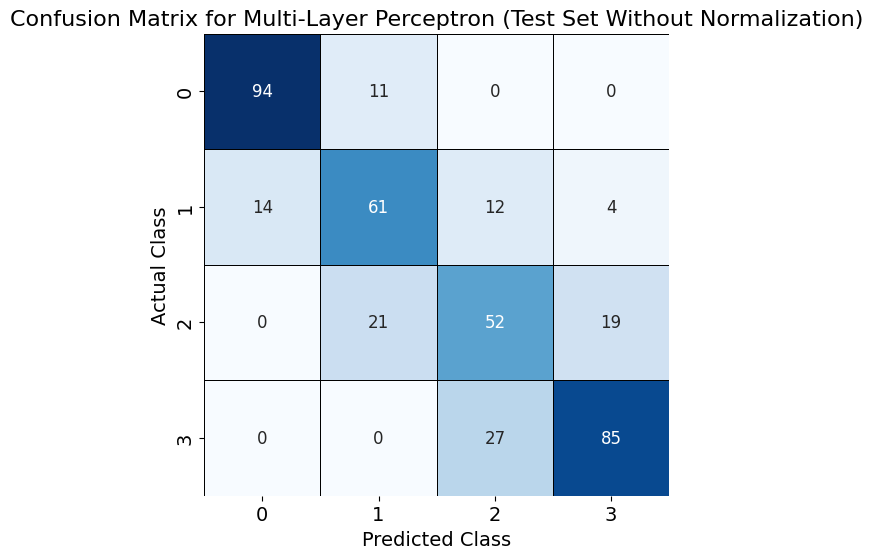

In [35]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test1 = confusion_matrix(y_test, y_test_pred1)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test1, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=mlp_classifier1.classes_, yticklabels=mlp_classifier1.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Multi-Layer Perceptron (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

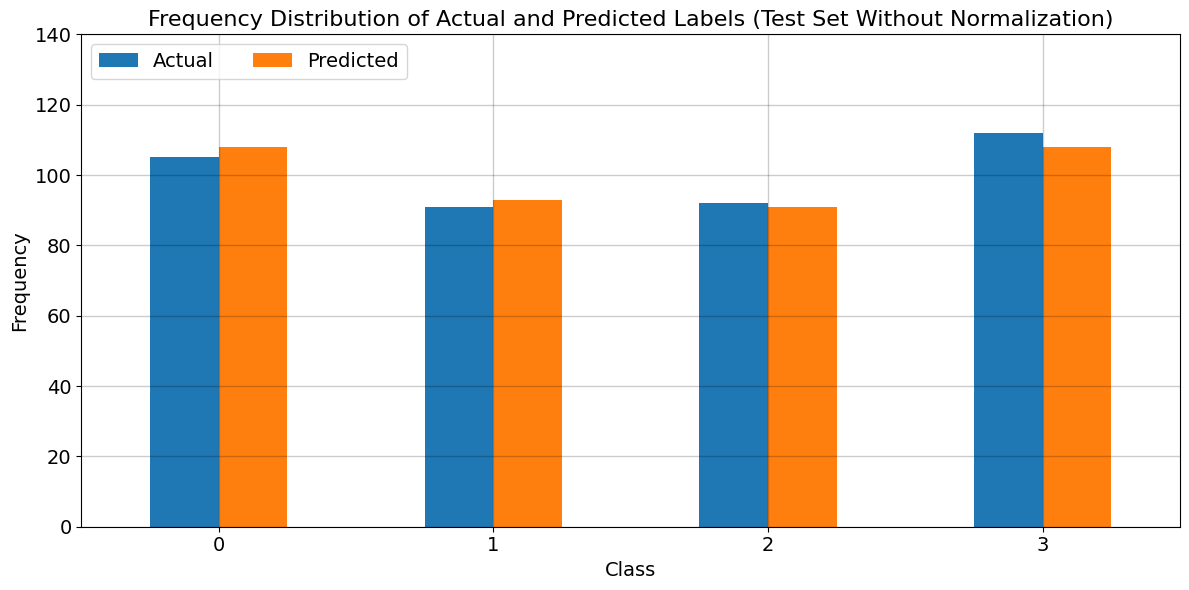

In [36]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test1, predicted_counts_test1 = np.unique(y_test_pred1, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test1, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set Without Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### Tanh Activation Function

In [37]:
# Intializing the MLP
mlp_classifier2 = MLPClassifier(hidden_layer_sizes=(50,), activation='tanh', max_iter=5000, random_state=42)

In [38]:
# Cross-validation and its performance metrics
accuracy_cv2 = cross_val_score(mlp_classifier2, X_train, y_train, cv=5, scoring='accuracy')
precision_cv2 = cross_val_score(mlp_classifier2, X_train, y_train, cv=5, scoring='precision_macro')
recall_cv2 = cross_val_score(mlp_classifier2, X_train, y_train, cv=5, scoring='recall_macro')
f1score_cv2 = cross_val_score(mlp_classifier2, X_train, y_train, cv=5, scoring='f1_macro')

acc_cv2 = round(np.mean(accuracy_cv2)*100,3)
pre_cv2 = round(np.mean(precision_cv2)*100,3)
rec_cv2 = round(np.mean(recall_cv2)*100,3)
f1_cv2 = round(np.mean(f1score_cv2)*100,3)

print('Cross-Validation Accuracy (Without Normalization):',acc_cv2,'%')
print('Cross-Validation Precision (Without Normalization):',pre_cv2,'%')
print('Cross-Validation Recall (Without Normalization):',rec_cv2,'%')
print('Cross-Validation F1 Score (Without Normalization):',f1_cv2,'%')

Cross-Validation Accuracy (Without Normalization): 63.062 %
Cross-Validation Precision (Without Normalization): 62.495 %
Cross-Validation Recall (Without Normalization): 63.443 %
Cross-Validation F1 Score (Without Normalization): 62.38 %


In [39]:
# Making predictions on the test set
mlp_classifier2.fit(X_train, y_train)
y_test_pred2 = mlp_classifier2.predict(X_test)

In [40]:
# Evaluating the classifier on the test set
accuracy_test2 = accuracy_score(y_test, y_test_pred2)
precision_test2 = precision_score(y_test, y_test_pred2, average='macro')
recall_test2 = recall_score(y_test, y_test_pred2, average='macro')
f1score_test2 = f1_score(y_test, y_test_pred2, average='macro')

acc_tst2 = round(np.mean(accuracy_test2)*100,3)
pre_tst2 = round(np.mean(precision_test2)*100,3)
rec_tst2 = round(np.mean(recall_test2)*100,3)
f1_tst2 = round(np.mean(f1score_test2)*100,3)

print('Test Accuracy (Without Normalization):',acc_tst2,'%')
print('Test Precision (Without Normalization):',pre_tst2,'%')
print('Test Recall (Without Normalization):',rec_tst2,'%')
print('Test F1 Score (Without Normalization):',f1_tst2,'%')

Test Accuracy (Without Normalization): 72.0 %
Test Precision (Without Normalization): 72.331 %
Test Recall (Without Normalization): 71.157 %
Test F1 Score (Without Normalization): 71.397 %


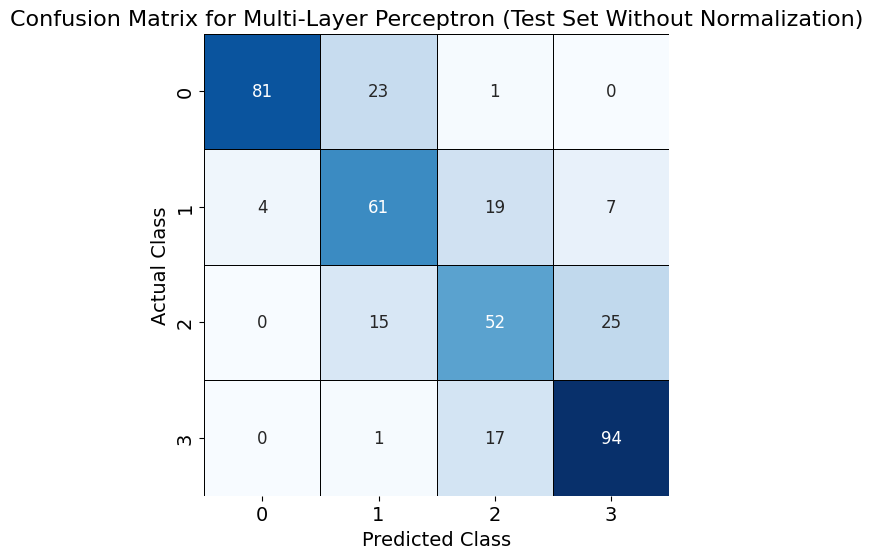

In [41]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test2 = confusion_matrix(y_test, y_test_pred2)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test2, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=mlp_classifier2.classes_, yticklabels=mlp_classifier2.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Multi-Layer Perceptron (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

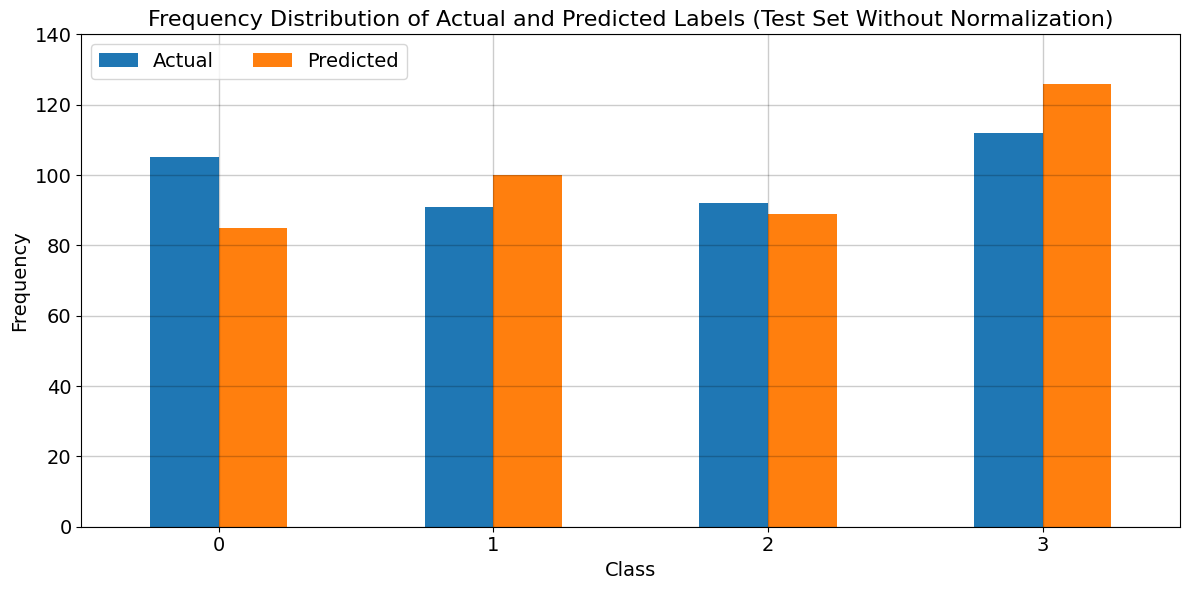

In [42]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test2, predicted_counts_test2 = np.unique(y_test_pred2, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test2, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set Without Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### ReLU Activation Function

In [43]:
# Intializing the MLP
mlp_classifier3 = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=5000, random_state=42)

In [44]:
# Cross-validation and its performance metrics
accuracy_cv3 = cross_val_score(mlp_classifier3, X_train, y_train, cv=5, scoring='accuracy')
precision_cv3 = cross_val_score(mlp_classifier3, X_train, y_train, cv=5, scoring='precision_macro')
recall_cv3 = cross_val_score(mlp_classifier3, X_train, y_train, cv=5, scoring='recall_macro')
f1score_cv3 = cross_val_score(mlp_classifier3, X_train, y_train, cv=5, scoring='f1_macro')

acc_cv3 = round(np.mean(accuracy_cv3)*100,3)
pre_cv3 = round(np.mean(precision_cv3)*100,3)
rec_cv3 = round(np.mean(recall_cv3)*100,3)
f1_cv3 = round(np.mean(f1score_cv3)*100,3)

print('Cross-Validation Accuracy (Without Normalization):',acc_cv3,'%')
print('Cross-Validation Precision (Without Normalization):',pre_cv3,'%')
print('Cross-Validation Recall (Without Normalization):',rec_cv3,'%')
print('Cross-Validation F1 Score (Without Normalization):',f1_cv3,'%')

Cross-Validation Accuracy (Without Normalization): 62.438 %
Cross-Validation Precision (Without Normalization): 64.72 %
Cross-Validation Recall (Without Normalization): 62.783 %
Cross-Validation F1 Score (Without Normalization): 60.682 %


In [45]:
# Making predictions on the test set
mlp_classifier3.fit(X_train, y_train)
y_test_pred3 = mlp_classifier3.predict(X_test)

In [46]:
# Evaluating the classifier on the test set
accuracy_test3 = accuracy_score(y_test, y_test_pred3)
precision_test3 = precision_score(y_test, y_test_pred3, average='macro')
recall_test3 = recall_score(y_test, y_test_pred3, average='macro')
f1score_test3 = f1_score(y_test, y_test_pred3, average='macro')

acc_tst3 = round(np.mean(accuracy_test3)*100,3)
pre_tst3 = round(np.mean(precision_test3)*100,3)
rec_tst3 = round(np.mean(recall_test3)*100,3)
f1_tst3 = round(np.mean(f1score_test3)*100,3)

print('Test Accuracy (Without Normalization):',acc_tst3,'%')
print('Test Precision (Without Normalization):',pre_tst3,'%')
print('Test Recall (Without Normalization):',rec_tst3,'%')
print('Test F1 Score (Without Normalization):',f1_tst3,'%')

Test Accuracy (Without Normalization): 62.5 %
Test Precision (Without Normalization): 64.794 %
Test Recall (Without Normalization): 62.12 %
Test F1 Score (Without Normalization): 62.618 %


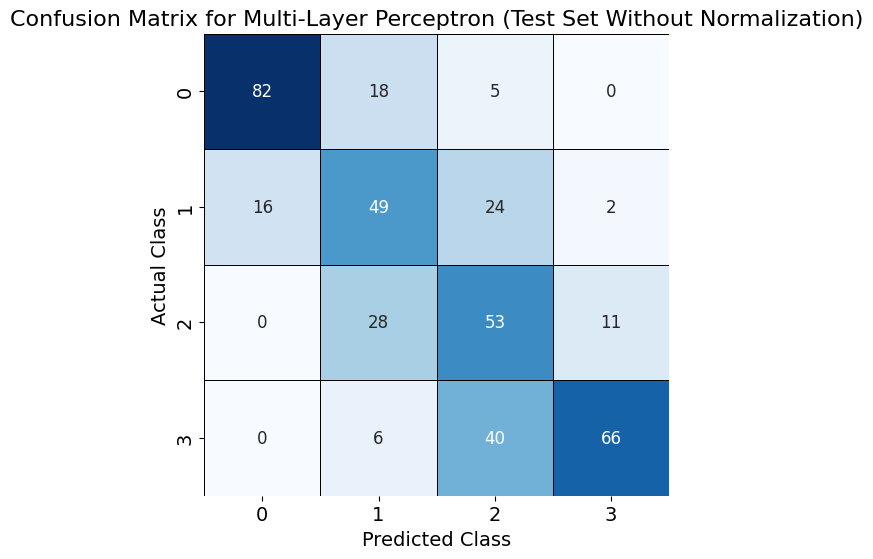

In [47]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test3 = confusion_matrix(y_test, y_test_pred3)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test3, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=mlp_classifier3.classes_, yticklabels=mlp_classifier3.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Multi-Layer Perceptron (Test Set Without Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

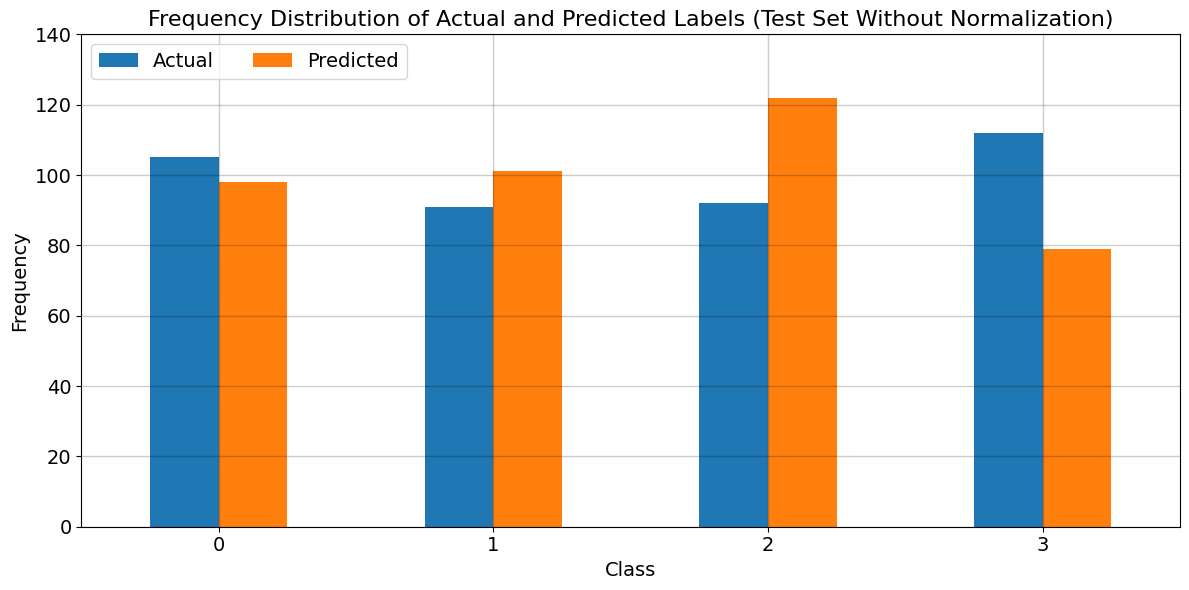

In [48]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test3, predicted_counts_test3 = np.unique(y_test_pred3, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test3, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set Without Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

## With Normalization

In [49]:
# Normalizing the data
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [50]:
# Splitting the dataset into training and testing subsets
X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

### Logistic/Sigmoid Activation Function

In [76]:
# Intializing the MLP
mlp_classifier4 = MLPClassifier(hidden_layer_sizes=(50,), activation='logistic', max_iter=5000, random_state=42)

In [77]:
# Cross-validation and its performance metrics
accuracy_cv4 = cross_val_score(mlp_classifier4, X_train_normalized, y_train, cv=5, scoring='accuracy')
precision_cv4 = cross_val_score(mlp_classifier4, X_train_normalized, y_train, cv=5, scoring='precision_macro')
recall_cv4 = cross_val_score(mlp_classifier4, X_train_normalized, y_train, cv=5, scoring='recall_macro')
f1score_cv4 = cross_val_score(mlp_classifier4, X_train_normalized, y_train, cv=5, scoring='f1_macro')

acc_cv4 = round(np.mean(accuracy_cv4)*100,3)
pre_cv4 = round(np.mean(precision_cv4)*100,3)
rec_cv4 = round(np.mean(recall_cv4)*100,3)
f1_cv4 = round(np.mean(f1score_cv4)*100,3)

print('Cross-Validation Accuracy (With Normalization):',acc_cv4,'%')
print('Cross-Validation Precision (With Normalization):',pre_cv4,'%')
print('Cross-Validation Recall (With Normalization):',rec_cv4,'%')
print('Cross-Validation F1 Score (With Normalization):',f1_cv4,'%')

Cross-Validation Accuracy (With Normalization): 94.562 %
Cross-Validation Precision (With Normalization): 94.656 %
Cross-Validation Recall (With Normalization): 94.612 %
Cross-Validation F1 Score (With Normalization): 94.596 %


In [78]:
# Making predictions on the test set
mlp_classifier4.fit(X_train_normalized, y_train)
y_test_pred4 = mlp_classifier4.predict(X_test_normalized)

In [79]:
# Evaluating the classifier on the test set
accuracy_test4 = accuracy_score(y_test, y_test_pred4)
precision_test4 = precision_score(y_test, y_test_pred4, average='macro')
recall_test4 = recall_score(y_test, y_test_pred4, average='macro')
f1score_test4 = f1_score(y_test, y_test_pred4, average='macro')

acc_tst4 = round(np.mean(accuracy_test4)*100,3)
pre_tst4 = round(np.mean(precision_test4)*100,3)
rec_tst4 = round(np.mean(recall_test4)*100,3)
f1_tst4 = round(np.mean(f1score_test4)*100,3)

print('Test Accuracy (With Normalization):',acc_tst4,'%')
print('Test Precision (With Normalization):',pre_tst4,'%')
print('Test Recall (With Normalization):',rec_tst4,'%')
print('Test F1 Score (With Normalization):',f1_tst4,'%')

Test Accuracy (With Normalization): 95.75 %
Test Precision (With Normalization): 95.705 %
Test Recall (With Normalization): 95.773 %
Test F1 Score (With Normalization): 95.689 %


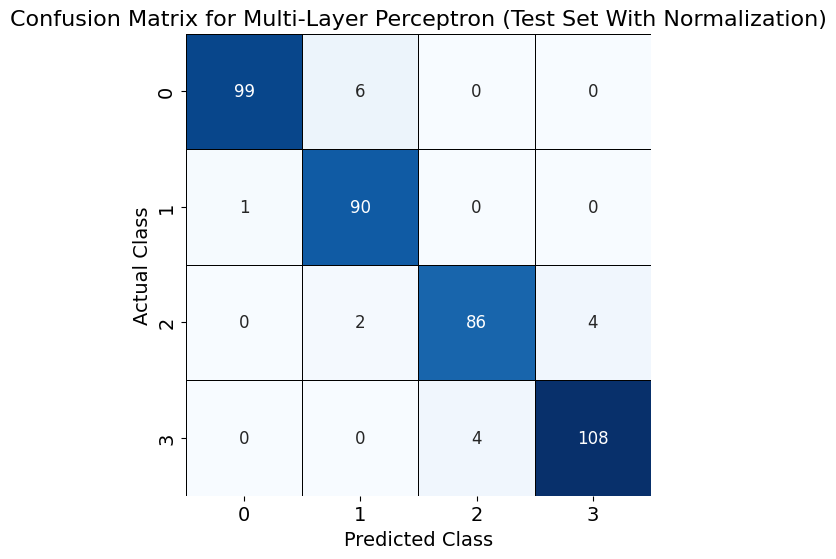

In [80]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test4 = confusion_matrix(y_test, y_test_pred4)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test4, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=mlp_classifier4.classes_, yticklabels=mlp_classifier4.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Multi-Layer Perceptron (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

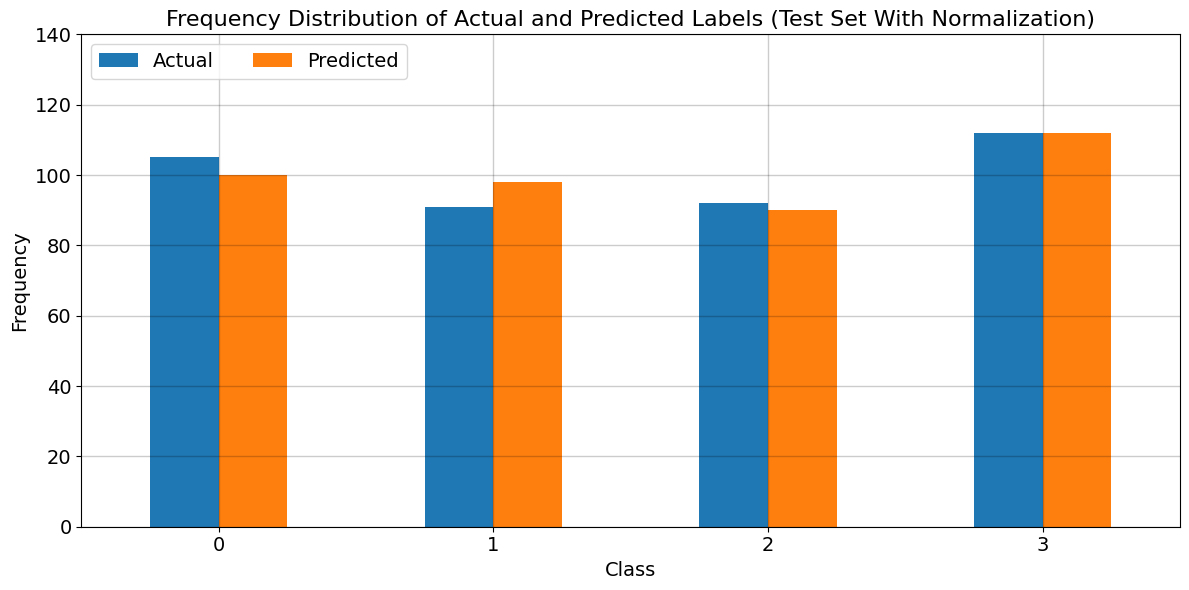

In [81]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test4, predicted_counts_test4 = np.unique(y_test_pred4, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test4, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set With Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### Tanh Activation Function

In [82]:
# Intializing the MLP
mlp_classifier5 = MLPClassifier(hidden_layer_sizes=(50,), activation='tanh', max_iter=5000, random_state=42)

In [83]:
# Cross-validation and its performance metrics
accuracy_cv5 = cross_val_score(mlp_classifier5, X_train_normalized, y_train, cv=5, scoring='accuracy')
precision_cv5 = cross_val_score(mlp_classifier5, X_train_normalized, y_train, cv=5, scoring='precision_macro')
recall_cv5 = cross_val_score(mlp_classifier5, X_train_normalized, y_train, cv=5, scoring='recall_macro')
f1score_cv5 = cross_val_score(mlp_classifier5, X_train_normalized, y_train, cv=5, scoring='f1_macro')

acc_cv5 = round(np.mean(accuracy_cv5)*100,3)
pre_cv5 = round(np.mean(precision_cv5)*100,3)
rec_cv5 = round(np.mean(recall_cv5)*100,3)
f1_cv5 = round(np.mean(f1score_cv5)*100,3)

print('Cross-Validation Accuracy (With Normalization):',acc_cv5,'%')
print('Cross-Validation Precision (With Normalization):',pre_cv5,'%')
print('Cross-Validation Recall (With Normalization):',rec_cv5,'%')
print('Cross-Validation F1 Score (With Normalization):',f1_cv5,'%')

Cross-Validation Accuracy (With Normalization): 93.812 %
Cross-Validation Precision (With Normalization): 93.906 %
Cross-Validation Recall (With Normalization): 93.868 %
Cross-Validation F1 Score (With Normalization): 93.86 %


In [84]:
# Making predictions on the test set
mlp_classifier5.fit(X_train_normalized, y_train)
y_test_pred5 = mlp_classifier5.predict(X_test_normalized)

In [85]:
# Evaluating the classifier on the test set
accuracy_test5 = accuracy_score(y_test, y_test_pred5)
precision_test5 = precision_score(y_test, y_test_pred5, average='macro')
recall_test5 = recall_score(y_test, y_test_pred5, average='macro')
f1score_test5 = f1_score(y_test, y_test_pred5, average='macro')

acc_tst5 = round(np.mean(accuracy_test5)*100,3)
pre_tst5 = round(np.mean(precision_test5)*100,3)
rec_tst5 = round(np.mean(recall_test5)*100,3)
f1_tst5 = round(np.mean(f1score_test5)*100,3)

print('Test Accuracy (With Normalization):',acc_tst5,'%')
print('Test Precision (With Normalization):',pre_tst5,'%')
print('Test Recall (With Normalization):',rec_tst5,'%')
print('Test F1 Score (With Normalization):',f1_tst5,'%')

Test Accuracy (With Normalization): 96.25 %
Test Precision (With Normalization): 96.236 %
Test Recall (With Normalization): 96.167 %
Test F1 Score (With Normalization): 96.162 %


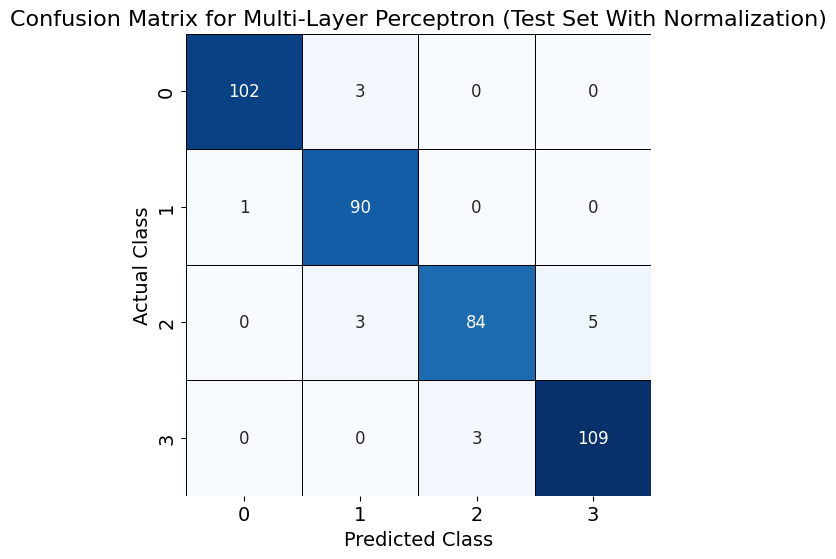

In [86]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test5 = confusion_matrix(y_test, y_test_pred5)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test5, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=mlp_classifier5.classes_, yticklabels=mlp_classifier5.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Multi-Layer Perceptron (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

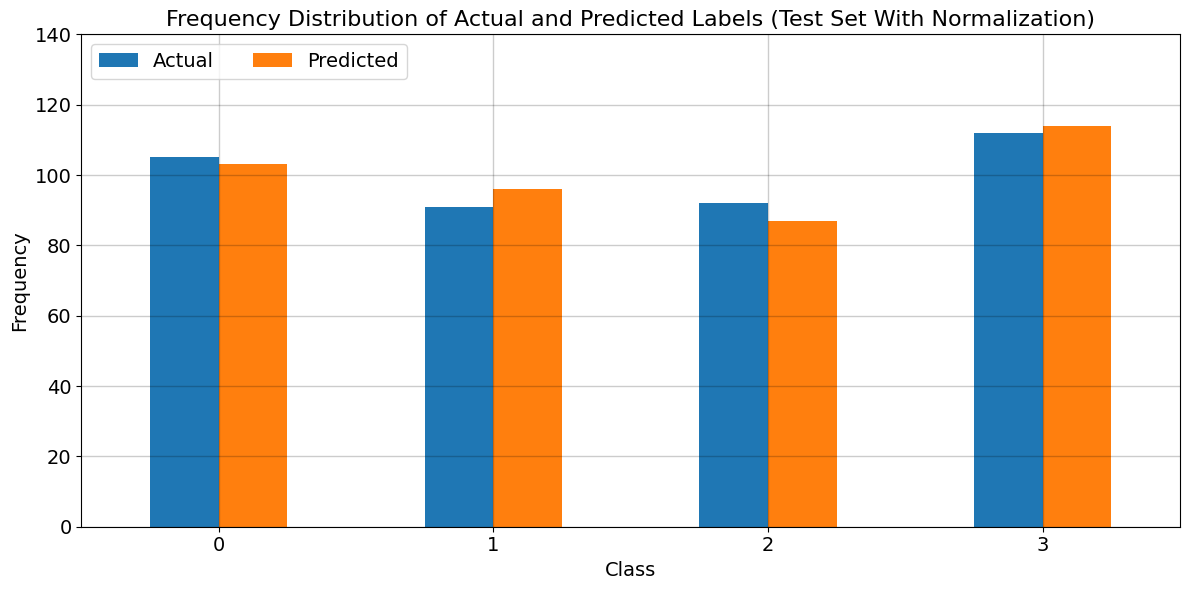

In [87]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test5, predicted_counts_test5 = np.unique(y_test_pred5, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test5, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set With Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

### ReLU Activation Function

In [88]:
# Intializing the MLP
mlp_classifier6 = MLPClassifier(hidden_layer_sizes=(50,), activation='relu', max_iter=5000, random_state=42)

In [89]:
# Cross-validation and its performance metrics
accuracy_cv6 = cross_val_score(mlp_classifier6, X_train_normalized, y_train, cv=5, scoring='accuracy')
precision_cv6 = cross_val_score(mlp_classifier6, X_train_normalized, y_train, cv=5, scoring='precision_macro')
recall_cv6 = cross_val_score(mlp_classifier6, X_train_normalized, y_train, cv=5, scoring='recall_macro')
f1score_cv6 = cross_val_score(mlp_classifier6, X_train_normalized, y_train, cv=5, scoring='f1_macro')

acc_cv6 = round(np.mean(accuracy_cv6)*100,3)
pre_cv6 = round(np.mean(precision_cv6)*100,3)
rec_cv6 = round(np.mean(recall_cv6)*100,3)
f1_cv6 = round(np.mean(f1score_cv6)*100,3)

print('Cross-Validation Accuracy (With Normalization):',acc_cv6,'%')
print('Cross-Validation Precision (With Normalization):',pre_cv6,'%')
print('Cross-Validation Recall (With Normalization):',rec_cv6,'%')
print('Cross-Validation F1 Score (With Normalization):',f1_cv6,'%')

Cross-Validation Accuracy (With Normalization): 90.938 %
Cross-Validation Precision (With Normalization): 91.066 %
Cross-Validation Recall (With Normalization): 91.0 %
Cross-Validation F1 Score (With Normalization): 90.991 %


In [90]:
# Making predictions on the test set
mlp_classifier6.fit(X_train_normalized, y_train)
y_test_pred6 = mlp_classifier6.predict(X_test_normalized)

In [91]:
# Evaluating the classifier on the test set
accuracy_test6 = accuracy_score(y_test, y_test_pred6)
precision_test6 = precision_score(y_test, y_test_pred6, average='macro')
recall_test6 = recall_score(y_test, y_test_pred6, average='macro')
f1score_test6 = f1_score(y_test, y_test_pred6, average='macro')

acc_tst6 = round(np.mean(accuracy_test6)*100,3)
pre_tst6 = round(np.mean(precision_test6)*100,3)
rec_tst6 = round(np.mean(recall_test6)*100,3)
f1_tst6 = round(np.mean(f1score_test6)*100,3)

print('Test Accuracy (With Normalization):',acc_tst6,'%')
print('Test Precision (With Normalization):',pre_tst6,'%')
print('Test Recall (With Normalization):',rec_tst6,'%')
print('Test F1 Score (With Normalization):',f1_tst6,'%')

Test Accuracy (With Normalization): 93.5 %
Test Precision (With Normalization): 93.436 %
Test Recall (With Normalization): 93.452 %
Test F1 Score (With Normalization): 93.383 %


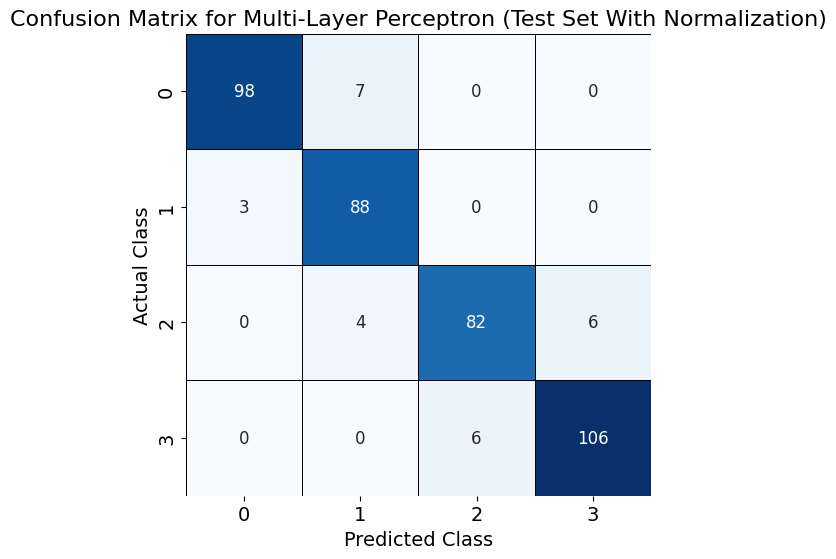

In [92]:
# Generating and plotting the confusion matrix for the test set
conf_matrix_test6 = confusion_matrix(y_test, y_test_pred6)

plt.figure(figsize=(6,6))
sns.heatmap(conf_matrix_test6, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5, linecolor='black',
            xticklabels=mlp_classifier6.classes_, yticklabels=mlp_classifier6.classes_, annot_kws={"size": 12})
plt.xlabel('Predicted Class', color='black', fontsize=14)
plt.ylabel('Actual Class', color='black', fontsize=14)
plt.title('Confusion Matrix for Multi-Layer Perceptron (Test Set With Normalization)', color='black', fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=14)
plt.show()

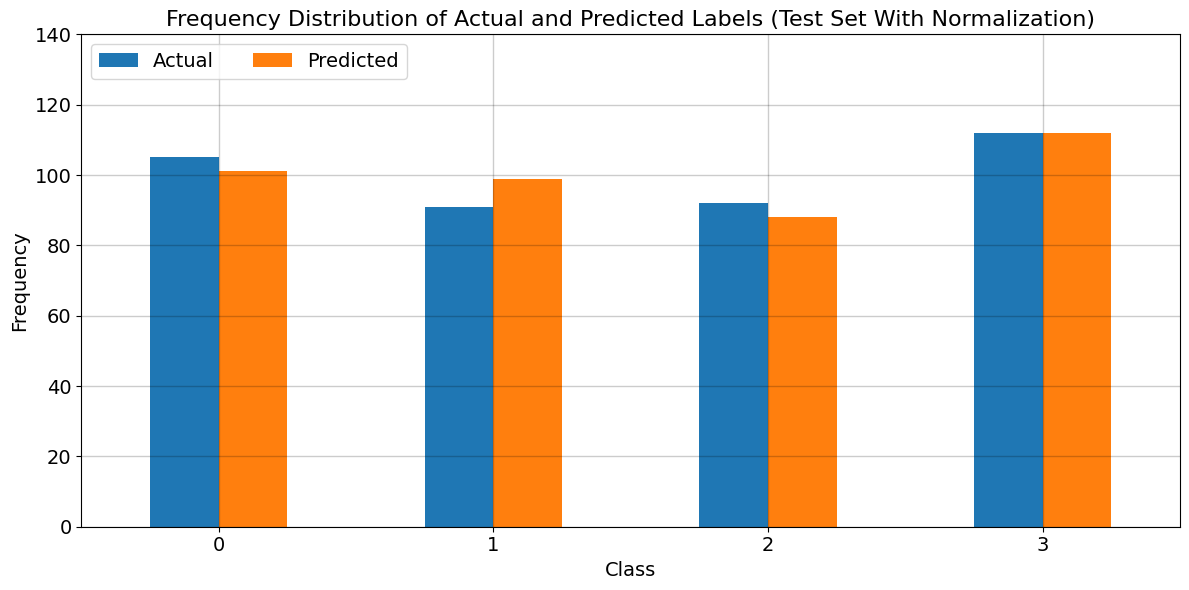

In [93]:
# Plotting the bar graph for frequency distribution of actual and predicted labels (Test Set)
actual_labels_test, actual_counts_test = np.unique(y_test, return_counts=True)
predicted_labels_test6, predicted_counts_test6 = np.unique(y_test_pred6, return_counts=True)

labels_test = np.unique(y_test)

x_test = np.arange(len(labels_test))
width = 0.25

fig, ax = plt.subplots(figsize=(12,6))
rects1_test = ax.bar(x_test - width/2, actual_counts_test, width, label='Actual')
rects2_test = ax.bar(x_test + width/2, predicted_counts_test6, width, label='Predicted')

ax.set_xlabel('Class', color='black', fontsize=14)
ax.set_ylabel('Frequency', color='black', fontsize=14)
ax.set_title('Frequency Distribution of Actual and Predicted Labels (Test Set With Normalization)', color='black', fontsize=16)
ax.set_xticks(x_test)
ax.tick_params(axis='both', which='major', labelsize=14)
ax.legend(fontsize=14, ncol=2, loc="upper left")
plt.grid(True, linewidth=1, color='black', alpha=0.2)

ax.set_xlim([-0.5, len(labels_test) - 0.5]) 
plt.ylim((0,140))
fig.tight_layout()
plt.show()

***